
# **Problem Statement:** 
Analyze and predict the viewership and success of movies and TV shows on a streaming platform based on various attributes such as type, title, director, cast, country, date added, release year, rating, duration, listed in, and description. 

Specifically, I want to answer the following questions and perform tasks related to this dataset:

1. **Viewership and Popularity Analysis:** 
   - What are the most popular types of content on the platform (Movies or TV Shows)?
   - Which countries contribute the most content?
   - Does the release year affect the popularity of content?

2. **Content Duration Analysis:**

   - Are there any trends in content duration over the years?
   
3. **Genre Analysis:**
   - Which genres are most prevalent on the platform?
   - Are there any trends in the popularity of specific genres?

4. **Country Analysis:**
   - Do viewers have a preference for content from certain countries?  

4. **Predictive Modeling:**
   - Can we build a model to predict the success (e.g., viewership, ratings) of a movie or TV show based on its attributes?


By addressing these questions and tasks, the streaming platform can gain insights into its content library, viewer preferences

# Regarding Dataset 

About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

***Description of each column in the dataset:***

1. **show_id:** A unique identifier for each show or movie.
   
2. **type:** The type of content, either "Movie" or "TV Show."

3. **title:** The title of the movie or TV show.

4. **director:** The director of the movie or TV show. In the first and third entries, this information is not available (NaN).

5. **cast:** The cast or actors in the movie or TV show. In the first entry, this information is not available (NaN). In the second entry, there is a list of actors from the TV show "Blood & Water."

6. **country:** The country where the movie or TV show was produced or is associated with.

7. **date_added:** The date when the content was added to the streaming platform, in the format "Month Day, Year."

8. **release_year:** The year the movie or TV show was originally released.

9. **rating:** The content's rating, which indicates the recommended audience age or maturity level (e.g., "PG-13" or "TV-MA").

10. **duration:** The duration of the movie or TV show. In the first entry, the duration is given in minutes ("90 min"). In the second and third entries, it's indicated in the number of seasons ("2 Seasons" and "1 Season").

11. **listed_in:** The genre or category of the content, which can help classify it (e.g., "Documentaries," "International TV Shows," "Crime TV Shows").

12. **description:** A brief description or synopsis of the movie or TV show, providing an overview of the plot or subject matter.

# Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob #used for sentiment analysis



# Exploring The Dataset

In [2]:
n_data = pd.read_csv('netflix_titles.csv')

In [3]:
n_data.head(2)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


**Dropping Unnecessary Column**

In [4]:
# Dropping show_id and description column
n_data.drop(["show_id","description"], axis=1, inplace=True)

In [5]:
#Checking the data shape
print(f'This dataset contains {n_data.shape[0]} rows and {n_data.shape[1]} columns')

This dataset contains 8807 rows and 10 columns


In [6]:
print(n_data.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB
None 



In [9]:
print(n_data.isnull().sum())

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64


In [10]:
n_data.count()

type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
dtype: int64

In [11]:
n_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
# Index of the DataFrame
n_data.index

RangeIndex(start=0, stop=8807, step=1)

In [13]:
n_data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [14]:
n_data.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

**Netflix Data Null Percentage Analysis**

Perform an analysis of null (missing) values in a dataset, specifically a dataset related to Netflix content. the column names and their corresponding null percentages, making it easy to identify which columns have the most missing data

In [15]:
null_counts=n_data.isnull().sum()
total_rows=len(n_data)
null_percentage=(null_counts/total_rows) *100
null_percentage_df=pd.DataFrame({"column Name":null_percentage.index,"Null Percentage":null_percentage.values})
null_percentage_df=null_percentage_df.sort_values(by='Null Percentage',ascending=False)
null_percentage_df.reset_index(drop=True,inplace=True)
print(null_percentage_df)

#or
#n_data.isnull().sum()/len(df)*100

    column Name  Null Percentage
0      director        29.908028
1       country         9.435676
2          cast         9.367549
3    date_added         0.113546
4        rating         0.045418
5      duration         0.034064
6         title         0.000000
7          type         0.000000
8  release_year         0.000000
9     listed_in         0.000000


The high percentage of missing data in the "director" and "cast" columns may impact certain analyses or recommendations that rely on this information. Depending on the specific goals of the analysis, it may be necessary to address these missing values through data imputation or to focus on aspects of the dataset that are more complete. 

**Imputation of Missing Values in Netflix Dataset**

Missing values in selected columns of the Netflix dataset are imputed with the placeholder value "Unknown." The columns chosen for imputation include 'director,' 'country,' 'cast,' 'rating,' and 'duration.'

In [16]:
columns_to_impute = ['director', 'country', 'cast', 'rating', 'duration']
for column in columns_to_impute:
    n_data[column].fillna("Unknown", inplace=True)


C:\Users\7202C\AppData\Local\Temp\ipykernel_21704\809779325.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n_data[column].fillna("Unknown", inplace=True)


In [17]:
n_data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


In [18]:
n_data.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [19]:
n_data.type

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

**Segmentation of Netflix Dataset into TV Shows and Movies**

 the Netflix dataset is segmented into two distinct subsets: TV Shows and Movies. This segmentation is based on the 'type' column, which indicates whether a given entry is a "TV Show" or a "Movie."

In [20]:
Tv_show=n_data[n_data['type']== 'TV Show']
movie=n_data[n_data['type']== 'Movie']

In [21]:
display(Tv_show.head(2))
display(movie.head(2))

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies


In [22]:
print(n_data['type'].value_counts())


type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [23]:
movies_df = n_data[n_data['type'] == 'Movie']
oldest_movie = movies_df[movies_df['release_year'] == movies_df['release_year'].min()]
oldest_movie

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
7790,Movie,Prelude to War,Frank Capra,Unknown,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries"
8205,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries"


**Top 5 Popular Genres**

The top 5 most popular genres in the dataset, based on the number of titles available on Netflix, are 

1. International Movies with 2752 titles.
2. Dramas with 2427 titles.
3. Comedies with 1674 titles.
4. International TV Shows with 1351 titles.
5. Documentaries with 869 titles.



In [24]:
genre_counts = n_data['listed_in'].str.split(', ').explode().value_counts()
top_5_genres = genre_counts.head(5)
print("Top 5 most popular genres:-", top_5_genres)

Top 5 most popular genres:- listed_in
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: count, dtype: int64


These genres have a significant presence in the Netflix content library, with International Movies being the most prominent, followed by Dramas and Comedies. International TV Shows and Documentaries also have a substantial number of titles available on the platform, making them among the top genres on Netflix.

In [25]:
comedian_movies = n_data[n_data['listed_in'] == 'Comedies']
comedian_movies.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
27,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies
152,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Danie...",United States,"September 1, 2021",2016,TV-MA,88 min,Comedies
182,Movie,Welcome Home Roscoe Jenkins,Malcolm D. Lee,"Martin Lawrence, James Earl Jones, Joy Bryant,...",United States,"September 1, 2021",2008,PG-13,114 min,Comedies


**Top 5 popular actors**

The top 5 most popular actors in the dataset, based on the number of appearances in Netflix content, are as follows:

1. Anupam Kher with 43 appearances.
2. Shah Rukh Khan with 35 appearances.
3. Julie Tejwani with 33 appearances.
4. Naseeruddin Shah with 32 appearances.

These actors have a significant presence in Netflix content, with Anupam Kher being the most prolific with 43 appearances. It's clear that they are well-represented in the platform's offerings, making them prominent figures in the world of Netflix entertainment.

In [26]:
cast_counts = n_data['cast'].str.split(', ').explode().value_counts()
top_5_cast = cast_counts.head(5)
print("Top 5 most popular genres:-", top_5_cast)

Top 5 most popular genres:- cast
Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Name: count, dtype: int64


In [27]:
recent_movie_data = n_data[['title', 'type']].iloc[0]
pd.set_option('display.max_colwidth', None)
print(recent_movie_data)

title    Dick Johnson Is Dead
type                    Movie
Name: 0, dtype: object


# visualizing

In [28]:
# Distribution of content ratings on Netflix
content_type = n_data.groupby(['type']).size().reset_index(name='counts')
content_type
# Ploting Distribution of content ratings on Netflix
fig = px.pie(content_type, names = 'type',values = 'counts',color_discrete_sequence =  px.colors.sequential.Agsunset,
             title = 'Distribution of Content type on Netflix',height =  500 , width = 700)
fig.show()

**Netflix Content Release Year Distribution**

generates a histogram using the Plotly Express library to visualize the distribution of Netflix content based on the release year. Each bar in the histogram represents the count of content items released in a particular year. The 'release_year' column from the Netflix dataset is used as the x-axis, and each bar's color represents the corresponding release year.

In [29]:
fig = px.histogram(n_data,x="release_year", title="release_year", color="release_year")
# Update the layout and add box plots
fig.update_layout(
    bargap=0.2
)
fig.show()

**Distribution of Netflix Content by Country with Box Plot Marginals**

creates a histogram plot using the Plotly Express library (px) to visualize the distribution of Netflix content by country. The 'country' column is used as the x-axis variable, and a histogram is constructed to show the frequency of content from different countries. Additionally, the plot includes box plot marginals, which display summary statistics (such as quartiles and outliers) for the distribution of content within each country.

In [30]:
ax = px.histogram(n_data,x="country",marginal="box",title="country")
ax.update_layout(bargap=0.2)

**Distribution of Top 20 Netflix Content by Country with Bar Plot**

The 'Top_countries' Taken and used as the x-axis variable, and a bar plot is constructed to show the frequency of content from different Top 20 countries. 

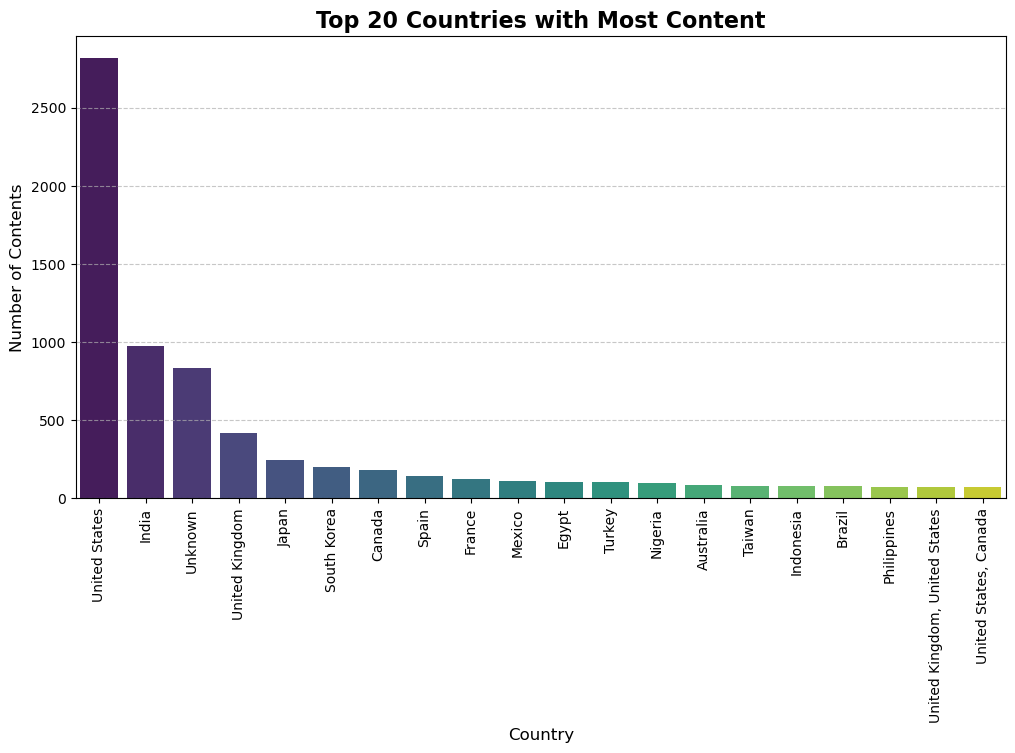

country
United States                    2818
India                             972
Unknown                           831
United Kingdom                    419
Japan                             245
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          87
Taiwan                             81
Indonesia                          79
Brazil                             77
Philippines                        75
United Kingdom, United States      75
United States, Canada              73
Name: count, dtype: int64

In [31]:
# Top 20 countries by content count
top_countries = n_data['country'].value_counts().head(20)
plt.figure(figsize=(12, 6))
colors = sns.color_palette("viridis", len(top_countries))
sns.barplot(
    x=top_countries.index,
    y=top_countries.values,
    hue=top_countries.index,  # Assign `x` variable to `hue`
    dodge=False,  # Prevent split bars
    palette=colors
)
plt.legend([], [], frameon=False)
plt.title('Top 20 Countries with Most Content', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Contents', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90, fontsize=10)
plt.show()
top_countries


**Analysis of Netflix Content Categories**

performs an analysis of the content categories within the Netflix dataset. It aims to provide insights into the distribution and popularity of different content categories.

************************************************
 listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
                                                   ... 
Action & Adventure, Cult Movies                       1
Action & Adventure, Comedies, Music & Musicals        1
Classic Movies, Horror Movies, Thrillers              1
Children & Family Movies, Classic Movies, Dramas      1
Cult Movies, Dramas, Thrillers                        1
Name: count, Length: 514, dtype: int64 
************************************************


C:\Users\7202C\AppData\Local\Temp\ipykernel_21704\4240279856.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




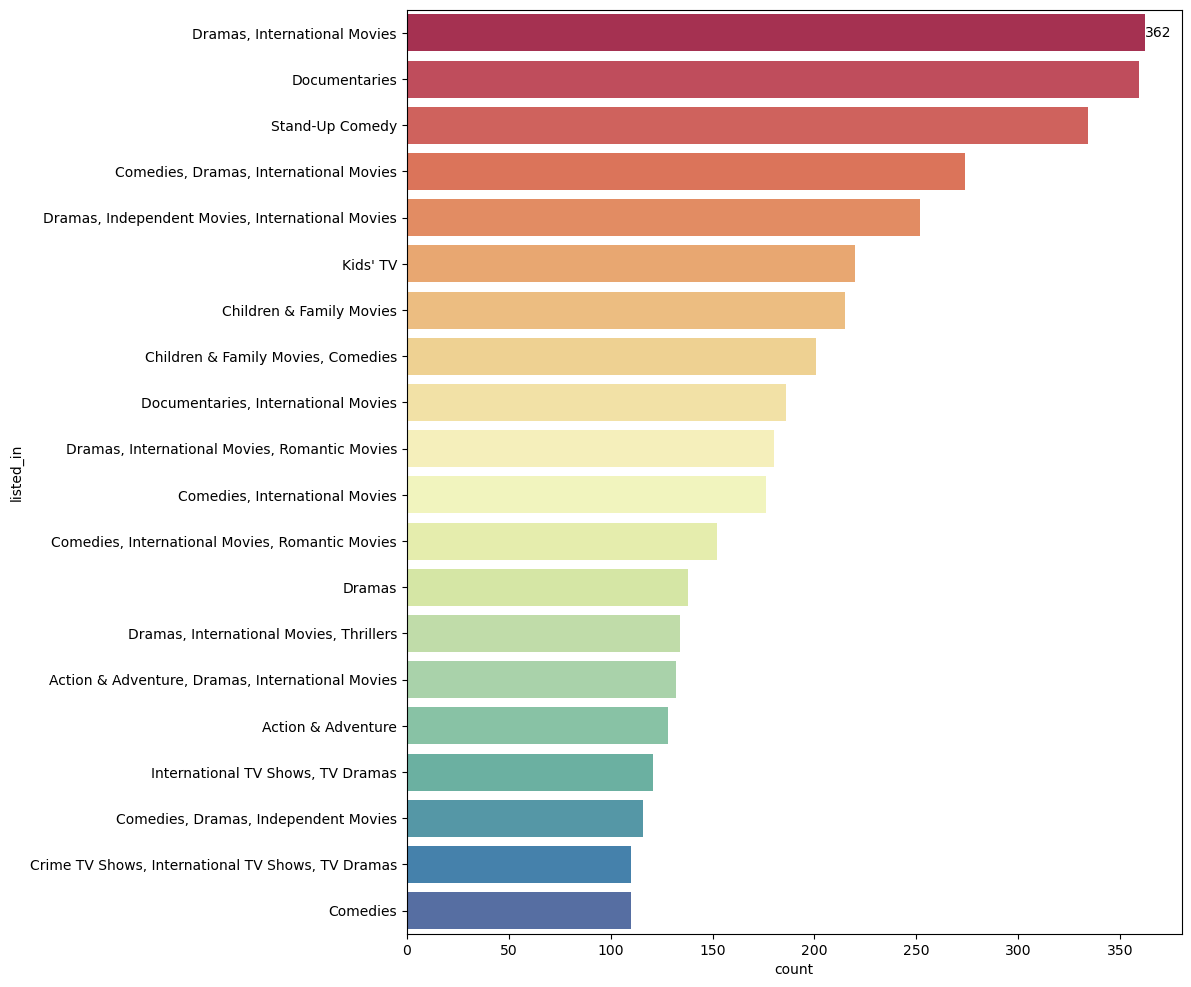

In [32]:
len(n_data['listed_in'].unique())
print('************************************************\n',n_data['listed_in'].value_counts(), '\n************************************************')
# Assuming 'n_data' is your DataFrame
plt.figure(figsize=(10, 12))
# Custom color palette
colors = sns.color_palette("Spectral", len(n_data['listed_in'].value_counts().index[0:20]))

ax = sns.countplot(
    data=n_data, y="listed_in", order=n_data['listed_in'].value_counts().index[0:20], palette=colors)
ax.bar_label(ax.containers[0])
plt.show()



**Netflix Content Rating Distribution**

the Plotly library to create a histogram visualization of the distribution of content ratings in the Netflix dataset. The 'rating' column is used as the variable of interest on the x-axis, and different content ratings are color-coded for visual distinction.

In [33]:
fig = px.histogram(n_data, x="rating", color="rating")
fig.update_layout(
    bargap=0.2
)
fig.show()

**Releas Year**

In [34]:
fig = px.bar(x=n_data["release_year"].value_counts().index, 
             y=n_data["release_year"].value_counts().values, 
             color=n_data["release_year"].value_counts().index)

# Update layout with customized title, axis labels, and background colors

fig.update_layout(
    title={
        'text': "Release Years",
        'font': {'color': 'black'}
    },
    xaxis_title={
        'text': "Release Year",
        'font': {'color': 'black'}
    },
    yaxis_title={
        'text': "Count",
        'font': {'color': 'black'}
    },
          
)


# Training and Testing

In [35]:
string_columns = n_data.select_dtypes(include=('object')).columns
string_columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added', 'rating',
       'duration', 'listed_in'],
      dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()
for col in string_columns:
    n_data[col] = le.fit_transform(n_data[col].astype('str'))

In [38]:
n_data["duration"].unique()

array([210, 110,   0, 211,  32, 208,   7,  34, 151, 182, 214, 162,  74,
       176,  79,  57,   6, 217,   9,  16, 138,  15,   8, 216,  31,  21,
       218, 126,  20,  29, 219, 206,   3, 174,   5, 213, 215, 203, 201,
        18,  38,  97, 160,  55, 205, 212, 198,  22,  35,  24,  53,  19,
        23,  11, 178,  28,  52,  66,  27, 200,  12,   4, 204, 125, 192,
       207,  68,  17,  10,  36,  44,  45,  78,  62,  42, 186, 202,  50,
       194, 185, 179, 173,  48, 184,  58, 101,  51,  39,  47, 199,  41,
         1,  30, 180, 183, 181, 177, 190,  40, 150, 158, 149, 196,  83,
        33,  67,  71,  46,  26, 135, 147, 145, 193, 175, 161, 172, 188,
       115, 120, 131, 189, 137, 159, 143, 146, 187,  59, 144,  61, 168,
       123,  75, 148, 191, 195, 169,  70,  77,  88,  96,  98, 119, 130,
       165,  63, 154, 122,  43,  91,  37, 166,  49, 167, 197, 171, 136,
       164, 209, 133, 157,  86, 134, 156,  56, 111,  69,  84, 114, 153,
       140, 107,  60, 128, 129, 127, 108, 132,  64, 103,  73, 11

**Data Preparation for Netflix Content Classification**

The separation of feature data (X) from the target variable (Y) is a fundamental step in machine learning and classification tasks. It allows for the training of classification models that predict the content type of Netflix entries based on the available features and attributes. 

In [39]:
x = n_data.drop(['type'], axis='columns')
y = n_data[['type']]

In [40]:
x

,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,1975,2295,7246,603,1711,2020,7,210,274
1,1091,4303,409,426,1706,2021,11,110,414
2,2651,2105,6296,736,1706,2021,11,0,242
3,3506,4303,7246,736,1706,2021,11,0,297
4,3861,4303,4815,251,1706,2021,11,110,393
...,...,...,...,...,...,...,...,...,...
8802,8770,979,4677,603,1419,2007,8,70,269
8803,8773,4303,7246,736,788,2018,14,110,424
8804,8774,3631,3231,603,1366,2009,8,206,207
8805,8777,3247,7061,603,665,2006,6,206,125


In [41]:
y

,type
0,0
1,1
2,1
3,1
4,1
...,...
8802,0
8803,1
8804,0
8805,0


In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.95501746, -0.4324983 ,  1.31950814, ..., -1.53739993,
         1.31840152,  0.0103443 ],
       [-1.30272563,  0.97829756, -1.60771148, ...,  0.50028112,
         0.18420988,  1.07524544],
       [-0.68912298, -0.56598994,  0.91277147, ...,  0.50028112,
        -1.06340093, -0.23306167],
       ...,
       [ 1.71926743,  0.50615871, -0.39948949, ..., -1.02797966,
         1.27303386, -0.49928695],
       [ 1.72044744,  0.23636508,  1.24030152, ..., -2.04682019,
         1.27303386, -1.12301476],
       [ 1.72202078,  0.01083446,  1.34177162, ..., -0.5185594 ,
        -0.88193027,  0.42109188]])

**Data Splitting into Training and Testing Sets**

Splitting the dataset into training and testing sets is a fundamental step in machine learning, allowing for the development and evaluation of predictive models.

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [44]:
len(X_train)

7045

In [45]:
len(X_test)

1762

In [46]:
len(y_train)

7045

In [47]:
len(y_test)

1762

In [48]:
from sklearn.metrics import accuracy_score

**Support Vector Classification**

In [49]:
from sklearn.svm import SVC
model_svm=SVC()
model_svm.fit(X_train,y_train.values.ravel())
predictions=model_svm.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"The accuracy of the SVM model on the test set is: {accuracy}")

The accuracy of the SVM model on the test set is: 0.9262202043132803


**DecisionTreeClassifier**

In [50]:
from sklearn import tree
model_DecisionTree=tree.DecisionTreeClassifier()
model_DecisionTree.fit(X_train,y_train)
predictions=model_DecisionTree.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"The accuracy of the DecisionTreeClassifier model on the test set is: {accuracy}")

The accuracy of the DecisionTreeClassifier model on the test set is: 0.9835414301929626


**Gaussian Naive Bayes**

In [51]:
from sklearn.naive_bayes import GaussianNB
#Gaussian distribution, bell curve
model_GaussianNB=GaussianNB()
model_GaussianNB.fit(X_train,y_train.values.ravel())
predictions=model_GaussianNB.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"The accuracy of the Naive Bayes model on the test set is:{accuracy}")

The accuracy of the Naive Bayes model on the test set is:0.8649262202043133


**LogisticRegression**

In [52]:
from sklearn.linear_model import LogisticRegression
model_LogisticRegression=LogisticRegression()
model_LogisticRegression.fit(X_train,y_train.values.ravel())
predictions=model_LogisticRegression.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print(f"The accuracy of the LogisticRegression model on the test set is: {accuracy}")

The accuracy of the LogisticRegression model on the test set is: 0.8859250851305335


**RandomForestClassifier**

In [53]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=100, random_state=0)
model_RF.fit(X_train, y_train.values.ravel())
predictions = model_RF.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"The accuracy of the RandomForestClassifier model on the test set is: {accuracy}")

The accuracy of the RandomForestClassifier model on the test set is: 0.9920544835414302


# Final Conclusion

This Netflix data analysis project provided several valuable insights into the platform's content library and viewer preferences. Key findings include:

**Content Type Trends**:
Movies significantly outnumber TV Shows on Netflix.
TV Shows, however, tend to have a higher duration (measured in seasons), indicating their potential for long-term viewer engagement.

**Country Contributions**:
The United States is the dominant contributor of content on Netflix, reflecting its global influence in the entertainment industry.
Several other countries also make significant contributions, showcasing Netflix's diverse content library.

**Genre Popularity**:
Popular genres like Action, Comedy, and Drama dominate the platform, indicating viewer preferences for these categories.
Niche genres like Documentaries and International content add variety, appealing to diverse audiences.

**Content Duration Trends**:
Movies typically range between 90 and 120 minutes, aligning with industry standards.
TV Shows often feature fewer than three seasons, reflecting Netflix's strategy of offering concise, engaging series.

**Viewer Accessibility**:
A variety of ratings cater to audiences of all ages, emphasizing Netflix's commitment to inclusivity.
